In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [68]:
train_df=pd.read_csv("F:/titanic/titanic/train.csv")
test_df=pd.read_csv("F:/titanic/titanic/test.csv")

In [69]:
train_df.shape,test_df.shape

((891, 12), (418, 11))

In [70]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [71]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [72]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [73]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [74]:
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace = True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace = True)

In [75]:
test_df['Age'].fillna(test_df['Age'].median(), inplace = True)
train_df['Age'].fillna(train_df['Age'].median(), inplace = True)

In [76]:
drop_column = ['Cabin']
train_df.drop(drop_column, axis=1, inplace = True)
test_df.drop(drop_column,axis=1,inplace=True)

In [77]:
print(train_df.isnull().sum())
print('___'*30)
print(test_df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
__________________________________________________________________________________________
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [78]:
all_data=[train_df,test_df]

In [79]:
for dataset in all_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

In [80]:
import re
# Define function to extract titles from passenger names
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

In [81]:
for dataset in all_data:
    dataset['Title'] = dataset['Name'].apply(get_title)

In [82]:
dataset["Title"].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Ms          1
Dona        1
Dr          1
Name: Title, dtype: int64

In [83]:
for dataset in all_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 
                                                 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [84]:
for dataset in all_data:
    dataset['Age_bin'] = pd.cut(dataset['Age'], bins=[0,12,20,40,120], labels=['Children','Teenage','Adult','Elder'])

In [85]:
dataset["Age_bin"].value_counts()

Adult       272
Elder        77
Teenage      44
Children     25
Name: Age_bin, dtype: int64

In [86]:
print(train_df.Age_bin.value_counts())
print("_"*30)
print(test_df.Age_bin.value_counts())

Adult       562
Elder       150
Teenage     110
Children     69
Name: Age_bin, dtype: int64
______________________________
Adult       272
Elder        77
Teenage      44
Children     25
Name: Age_bin, dtype: int64


In [87]:
for dataset in all_data:
    dataset['Fare_bin'] = pd.cut(dataset['Fare'], bins=[0,7.91,14.45,31,120], labels=['Low_fare','median_fare',
                                                                                      'Average_fare','high_fare'])

In [90]:
traindf=train_df
testdf=test_df

traindf.shape,train_df.shape

((891, 11), (891, 11))

In [88]:
for dataset in all_data:
    drop_column = ['Age','Fare','Name','Ticket']
    dataset.drop(drop_column, axis=1, inplace = True)

In [93]:
traindf.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,FamilySize,Title,Age_bin,Fare_bin
0,1,0,3,male,1,0,S,2,Mr,Adult,Low_fare
1,2,1,1,female,1,0,C,2,Mrs,Adult,high_fare
2,3,1,3,female,0,0,S,1,Miss,Adult,median_fare
3,4,1,1,female,1,0,S,2,Mrs,Adult,high_fare
4,5,0,3,male,0,0,S,1,Mr,Adult,median_fare


In [92]:
testdf.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,FamilySize,Title,Age_bin,Fare_bin
0,892,3,male,0,0,Q,1,Mr,Adult,Low_fare
1,893,3,female,1,0,S,2,Mrs,Elder,Low_fare
2,894,2,male,0,0,Q,1,Mr,Elder,median_fare
3,895,3,male,0,0,S,1,Mr,Adult,median_fare
4,896,3,female,1,1,S,3,Mrs,Adult,median_fare


### Creating Dummies

In [23]:
traindf = pd.get_dummies(traindf, columns = ["Sex","Title","Age_bin","Embarked","Fare_bin"],
                             prefix=["Sex","Title","Age_type","Em_type","Fare_type"])

testdf = pd.get_dummies(testdf, columns = ["Sex","Title","Age_bin","Embarked","Fare_bin"],
                             prefix=["Sex","Title","Age_type","Em_type","Fare_type"])

## Checking VIF

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [25]:
def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)


In [26]:
var_list1 =['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch', 'FamilySize',
       'Sex_female', 'Sex_male', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Rare', 'Age_type_Children', 'Age_type_Teenage',
       'Age_type_Adult', 'Age_type_Elder', 'Em_type_C', 'Em_type_Q',
       'Em_type_S', 'Fare_type_Low_fare', 'Fare_type_median_fare',
       'Fare_type_Average_fare', 'Fare_type_high_fare']

In [27]:
X = traindf[var_list1]
calc_vif(X)

,variables,VIF
0,PassengerId,1.019572
1,Survived,1.797052
2,Pclass,2.858322
3,SibSp,inf
4,Parch,inf
5,FamilySize,inf
6,Sex_female,inf
7,Sex_male,inf
8,Title_Master,inf
9,Title_Miss,inf


In [28]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix 


In [29]:
all_features = traindf.drop("Survived",axis=1)
Targeted_feature = traindf["Survived"]

X_train,X_test,y_train,y_test = train_test_split(all_features,Targeted_feature,test_size=0.3,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((623, 23), (268, 23), (623,), (268,))

## Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
prediction_lr=model.predict(X_test)

In [31]:
accuracy = round(accuracy_score(prediction_lr,y_test)*100,2)
print('The accuracy of the Logistic Regression is',accuracy)

The accuracy of the Logistic Regression is 82.84


In [32]:
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
result_lr=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for Logistic REgression is:',round(result_lr.mean()*100,2))

The cross validated score for Logistic REgression is: 81.93


Text(0.5, 1.05, 'Confusion_matrix')

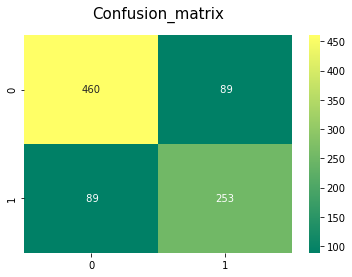

In [123]:
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

##  Random Forest Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(criterion='gini', n_estimators=700,
                             min_samples_split=10,min_samples_leaf=1)

In [36]:
model.fit(X_train,y_train)
prediction_rm=model.predict(X_test)
accuracy = round(accuracy_score(prediction_rm,y_test)*100,2)
print('The accuracy of the Random Forest Classifier is',accuracy)

The accuracy of the Random Forest Classifier is 81.72


In [37]:
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
result_rm=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for Random Forest Classifier is:',round(result_rm.mean()*100,2))

The cross validated score for Random Forest Classifier is: 82.61


Text(0.5, 1.05, 'Confusion_matrix')

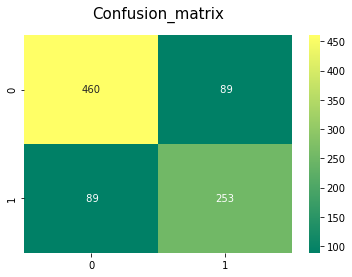

In [124]:
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

##  Support Vector Classifier

In [40]:
from sklearn.svm import SVC, LinearSVC
model = SVC()
model.fit(X_train,y_train)
prediction_svm=model.predict(X_test)

In [41]:
print('The accuracy of the Support Vector Machines Classifier is',round(accuracy_score(prediction_svm,y_test)*100,2))

The accuracy of the Support Vector Machines Classifier is 58.58


In [42]:
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
result_svm=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for Support Vector Machines Classifier is:',round(result_svm.mean()*100,2))

The cross validated score for Support Vector Machines Classifier is: 61.62


Text(0.5, 1.05, 'Confusion_matrix')

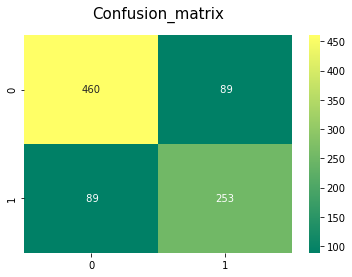

In [125]:
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

##  KNN Classifier

In [45]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 4)
model.fit(X_train,y_train)
prediction_knn=model.predict(X_test)
print('The accuracy of the K Nearst Neighbors Classifier is',round(accuracy_score(prediction_knn,y_test)*100,2))

The accuracy of the K Nearst Neighbors Classifier is 57.09


In [46]:
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
result_knn=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for K Nearest Neighbors Classifier is:',round(result_knn.mean()*100,2))

The cross validated score for K Nearest Neighbors Classifier is: 44.89


Text(0.5, 1.05, 'Confusion_matrix')

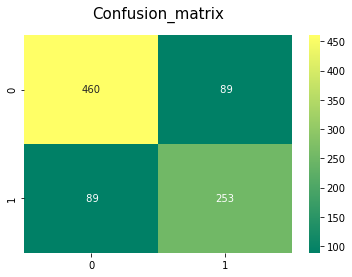

In [126]:
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

## Gaussian NAvie Bayes

In [115]:
from sklearn.naive_bayes import GaussianNB

model= GaussianNB()
model.fit(X_train,y_train)
prediction_gnb=model.predict(X_test)

print('The accuracy of the Gaussian Naive Bayes Classifier is',round(accuracy_score(prediction_gnb,y_test)*100,2))

The accuracy of the Gaussian Naive Bayes Classifier is 79.85


In [116]:
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
result_gnb=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for Gaussian Naive Bayes classifier is:',round(result_gnb.mean()*100,2))

The cross validated score for Gaussian Naive Bayes classifier is: 80.02


Text(0.5, 1.05, 'Confusion_matrix')

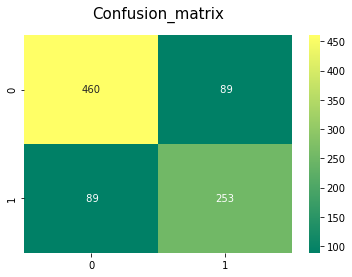

In [117]:
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

## Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier(criterion='gini', 
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto')
model.fit(X_train,y_train)
prediction_tree=model.predict(X_test)

In [50]:
print('The accuracy of the DecisionTree Classifier is',round(accuracy_score(prediction_tree,y_test)*100,2))

The accuracy of the DecisionTree Classifier is 78.73


In [51]:
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
result_tree=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for Decision Tree classifier is:',round(result_tree.mean()*100,2))

The cross validated score for Decision Tree classifier is: 76.78


Text(0.5, 1.05, 'Confusion_matrix')

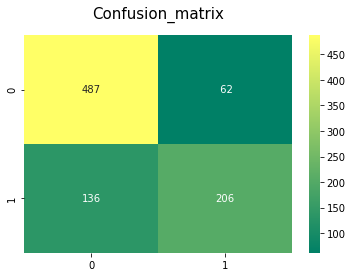

In [52]:
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

## ADA Boost Classifier

In [53]:
from sklearn.ensemble import AdaBoostClassifier
model= AdaBoostClassifier()
model.fit(X_train,y_train)
prediction_adb=model.predict(X_test)

In [54]:
print('The accuracy of the AdaBoostClassifier is',round(accuracy_score(prediction_adb,y_test)*100,2))

The accuracy of the AdaBoostClassifier is 79.85


In [55]:
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
result_adb=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoostClassifier is:',round(result_adb.mean()*100,2))

The cross validated score for AdaBoostClassifier is: 73.21


Text(0.5, 1.05, 'Confusion_matrix')

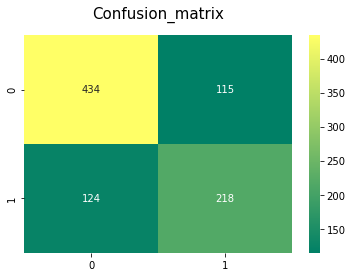

In [56]:
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

## Linear Discriminant Analysis

In [57]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model= LinearDiscriminantAnalysis()
model.fit(X_train,y_train)
prediction_lda=model.predict(X_test)

In [58]:
print('The accuracy of the LinearDiscriminantAnalysis is',round(accuracy_score(prediction_lda,y_test)*100,2))

The accuracy of the LinearDiscriminantAnalysis is 83.21


In [59]:
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
result_lda=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for LinearDiscriminantAnalysis is:',round(result_lda.mean()*100,2))

The cross validated score for LinearDiscriminantAnalysis is: 82.49


Text(0.5, 1.05, 'Confusion_matrix')

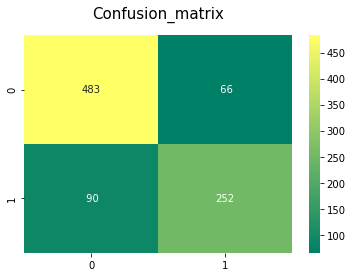

In [60]:
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

## Gradient Boosting Classifier

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier()
model.fit(X_train,y_train)
prediction_gbc=model.predict(X_test)

In [62]:
print('The accuracy of the Gradient Boosting Classifier is',round(accuracy_score(prediction_gbc,y_test)*100,2))

The accuracy of the Gradient Boosting Classifier is 82.84


In [63]:
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
result_gbc=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting Classifier is:',round(result_gbc.mean()*100,2))

The cross validated score for Gradient Boosting Classifier is: 77.66


Text(0.5, 1.05, 'Confusion_matrix')

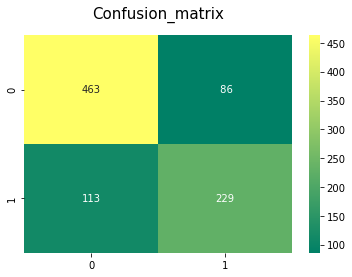

In [64]:
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

In [118]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'AdaBoostClassifier', 
              'Gradient Decent', 'Linear Discriminant Analysis', 
              'Decision Tree'],
    'Score': [result_svm.mean(), result_knn.mean(), result_lr.mean(), 
              result_rm.mean(), result_gnb.mean(), result_adb.mean(), 
              result_gbc.mean(), result_lda.mean(), result_tree.mean()]})

In [119]:
models

,Model,Score
0,Support Vector Machines,0.616167
1,KNN,0.448939
2,Logistic Regression,0.819288
3,Random Forest,0.826055
4,Naive Bayes,0.800237
5,AdaBoostClassifier,0.732097
6,Gradient Decent,0.776642
7,Linear Discriminant Analysis,0.824931
8,Decision Tree,0.767803


In [67]:
train_X = traindf.drop("Survived", axis=1)
train_Y=traindf["Survived"]
test_X  = testdf.drop("PassengerId", axis=1).copy()
test_X  = traindf.drop("PassengerId", axis=1).copy()
train_X.shape, train_Y.shape, test_X.shape

((891, 23), (891,), (891, 23))

In [120]:
# import xgboost as xgb
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import GradientBoostingClassifier
# model = GradientBoostingClassifier()
# param_grid = {'loss' : ["deviance"],
#               'n_estimators' : [100,200,300,400],
#               'learning_rate': [0.1, 0.05, 0.01,0.001],
#               'max_depth': [4, 8],
#               'min_samples_leaf': [100,150],
#               'max_features': [0.3, 0.2,0.1] 
#               }

In [ ]:
# modelf = GridSearchCV(model,param_grid = param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
# modelf.fit(train_X,train_Y)

In [121]:
# modelf.best_score_

In [122]:
#modelf.best_estimator_

In [70]:
# Random Forest Classifier Parameters tunning

model = RandomForestClassifier()
n_estim=range(100,1000,100)

## Search grid for optimal parameters
param_grid = {"n_estimators" :n_estim}

In [71]:
# model_rf = GridSearchCV(model,param_grid = param_grid, cv=5, scoring="accuracy", n_jobs= 4, verbose = 1)

# model_rf.fit(train_X,train_Y)

# print(model_rf.best_score_)

# model_rf.best_estimator_

In [72]:
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# model =LinearDiscriminantAnalysis()
# param_grid = {'tol':[0.001,0.01,.1,.2]}

# modell = GridSearchCV(model,param_grid = param_grid, cv=5, scoring="accuracy", n_jobs= 4, verbose = 1)

# modell.fit(train_X,train_Y)

# # Best score
# print(modell.best_score_)

# # Best Estimator
# modell.best_estimator_

In [73]:
# model = SVC()
# param_grid = {'kernel': ['rbf','linear'], 
#                   'gamma': [ 0.001, 0.01, 0.1, 1],
#                   'C': [1, 10, 50, 100,200,300, 1000]}

# modelsvm = GridSearchCV(model,param_grid = param_grid, cv=5, scoring="accuracy", n_jobs= 4, verbose = 1)

# modelsvm.fit(train_X,train_Y)

# print(modelsvm.best_estimator_)

# # Best score
# print(modelsvm.best_score_)

In [74]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features="auto", max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [75]:
train_X = traindf.drop("Survived", axis=1)
train_Y=traindf["Survived"]
test_X  = testdf
train_X.shape, train_Y.shape, test_X.shape

((891, 23), (891,), (418, 23))

In [76]:
train_X.head()

,PassengerId,Pclass,SibSp,Parch,FamilySize,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,...,Age_type_Teenage,Age_type_Adult,Age_type_Elder,Em_type_C,Em_type_Q,Em_type_S,Fare_type_Low_fare,Fare_type_median_fare,Fare_type_Average_fare,Fare_type_high_fare
0,1,3,1,0,2,0,1,0,0,1,...,0,1,0,0,0,1,1,0,0,0
1,2,1,1,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2,3,3,0,0,1,1,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0
3,4,1,1,0,2,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,5,3,0,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0


In [77]:
test_X.head()

,PassengerId,Pclass,SibSp,Parch,FamilySize,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,...,Age_type_Teenage,Age_type_Adult,Age_type_Elder,Em_type_C,Em_type_Q,Em_type_S,Fare_type_Low_fare,Fare_type_median_fare,Fare_type_Average_fare,Fare_type_high_fare
0,892,3,0,0,1,0,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
1,893,3,1,0,2,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
2,894,2,0,0,1,0,1,0,0,1,...,0,0,1,0,1,0,0,1,0,0
3,895,3,0,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
4,896,3,1,1,3,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0


In [78]:
traindf.head()

,PassengerId,Survived,Pclass,SibSp,Parch,FamilySize,Sex_female,Sex_male,Title_Master,Title_Miss,...,Age_type_Teenage,Age_type_Adult,Age_type_Elder,Em_type_C,Em_type_Q,Em_type_S,Fare_type_Low_fare,Fare_type_median_fare,Fare_type_Average_fare,Fare_type_high_fare
0,1,0,3,1,0,2,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
1,2,1,1,1,0,2,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2,3,1,3,0,0,1,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
3,4,1,1,1,0,2,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,5,0,3,0,0,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0


In [79]:
testdf.head()

,PassengerId,Pclass,SibSp,Parch,FamilySize,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,...,Age_type_Teenage,Age_type_Adult,Age_type_Elder,Em_type_C,Em_type_Q,Em_type_S,Fare_type_Low_fare,Fare_type_median_fare,Fare_type_Average_fare,Fare_type_high_fare
0,892,3,0,0,1,0,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
1,893,3,1,0,2,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
2,894,2,0,0,1,0,1,0,0,1,...,0,0,1,0,1,0,0,1,0,0
3,895,3,0,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
4,896,3,1,1,3,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0


In [80]:
random_forest.fit(train_X, train_Y)
Y_pred_rf = random_forest.predict(test_X)
random_forest.score(train_X,train_Y)
acc_random_forest = round(random_forest.score(train_X, train_Y) * 100, 2)

In [81]:
random_forest.fit(train_X, train_Y)
Y_pred_rf = random_forest.predict(test_X)
print(random_forest.score(train_X,train_Y))
acc_random_forest = round(random_forest.score(train_X, train_Y) * 100, 2)

1.0


Important features
____________________________________________________________
100.0


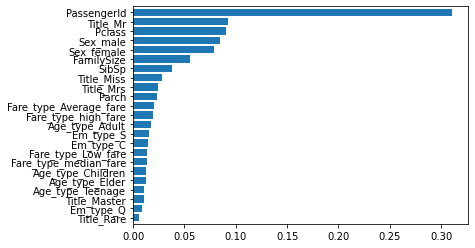

In [82]:
print("Important features")
pd.Series(random_forest.feature_importances_,train_X.columns).sort_values(ascending=True).plot.barh(width=0.8)
print('__'*30)
print(acc_random_forest)

In [83]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred_rf})

In [84]:
submission.to_csv("submission1.csv",index=False)

In [102]:
models = pd.DataFrame({
    'Model': [ 'KNN', 'LR', 
              'RF', 'Ada Boost', 
              'GD', 'LDA', 
              'DTree'],
    'Score': [ result_knn.mean(), result_lr.mean(), 
              result_rm.mean(),  result_adb.mean(), 
              result_gbc.mean(), result_lda.mean(), result_tree.mean()]})
models

,Model,Score
0,KNN,0.448939
1,LR,0.819288
2,RF,0.826055
3,Ada Boost,0.732097
4,GD,0.776642
5,LDA,0.824931
6,DTree,0.767803


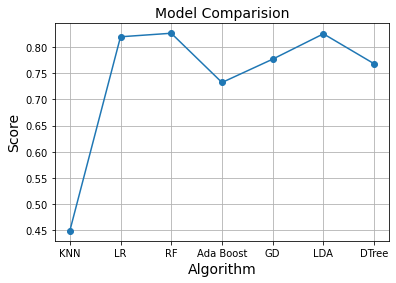

In [113]:
plt.plot(models["Model"], models['Score'], marker='o')
plt.title('Model Comparision', fontsize=14)
plt.xlabel('Algorithm', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.grid(True)
plt.show()